In [1]:
import pandas as pd
import numpy as np
from progress.bar import Bar
from Utils.Load import load_data_methodology_cutting
#from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from Utils.Metrics import f1, confusion_matrix_plot

2024-01-04 11:22:55.474965: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 11:22:55.594701: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 11:22:55.594764: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 11:22:55.594839: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 11:22:55.614509: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 11:22:55.616022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = pd.read_csv("../Metadata/data_curated.csv")
df.set_index("File", inplace=True)
df.head()

,Class
File,
S1V3C1M3A Clip166.npy,1
S1V1C1M1A Clip18.npy,1
S1V4C1M4A Clip241.npy,1
S1V4C1M4A Clip239.npy,1
S1V4C1M4A Clip245.npy,1


In [3]:
X, y, X_val, y_val = load_data_methodology_cutting(df,30,"M1")

In [4]:
X.shape

(2250, 30, 1662)

In [5]:
y.shape

(2250,)

In [6]:
X_val.shape

(750, 30, 1662)

In [7]:
y_val.shape

(750,)

# Recurrent Neural Networks

In [8]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [10]:
y = to_categorical(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 596774 (2.28 MB)
Trainable params: 596774 

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

2024-01-04 11:23:19.577285: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 314118000 exceeds 10% of free system memory.


Epoch 1/10
25/25 [==============================] - 16s 220ms/step - loss: 4.0710 - categorical_accuracy: 0.2216
Epoch 2/10
25/25 [==============================] - 5s 218ms/step - loss: 1.6619 - categorical_accuracy: 0.2451
Epoch 3/10
25/25 [==============================] - 6s 222ms/step - loss: 1.5061 - categorical_accuracy: 0.3137
Epoch 4/10
25/25 [==============================] - 6s 220ms/step - loss: 1.3661 - categorical_accuracy: 0.3816
Epoch 5/10
25/25 [==============================] - 6s 223ms/step - loss: 1.3414 - categorical_accuracy: 0.4349
Epoch 6/10
25/25 [==============================] - 5s 216ms/step - loss: 1.4965 - categorical_accuracy: 0.3371
Epoch 7/10
25/25 [==============================] - 6s 223ms/step - loss: 1.1804 - categorical_accuracy: 0.5067
Epoch 8/10
25/25 [==============================] - 6s 220ms/step - loss: 1.0086 - categorical_accuracy: 0.5797
Epoch 9/10
25/25 [==============================] - 6s 227ms/step - loss: 0.8053 - categorical_accuracy

In [14]:
y_pred = model.predict(X_val)

2024-01-04 11:24:26.311345: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 149580000 exceeds 10% of free system memory.


24/24 [==============================] - 3s 60ms/step


In [15]:
y_pred = np.argmax(y_pred, axis=1).tolist()

In [16]:
result = f1(y_val,y_pred)

In [17]:
float(result)

0.7239998579025269

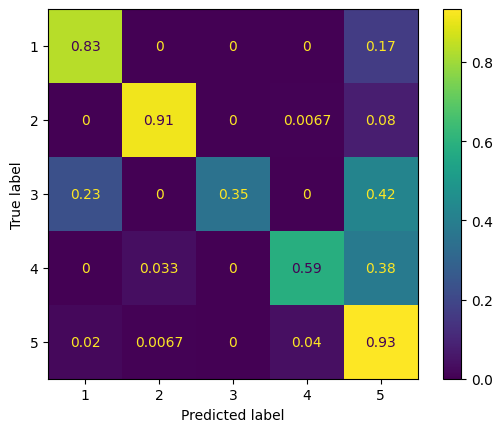

In [18]:
disp = confusion_matrix_plot(y_val, y_pred)
disp.plot()